In [8]:
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pandas as pd
import scipy.stats as stats
import datetime as dt
import vars.var_ntime as nvar
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('ggplot')

In [9]:
df=pd.read_csv('data_monthly.CSV')

In [10]:
df

,Unnamed: 0,Mkt-RF,SMB,HML,WML
0,192701,-0.06,-0.56,4.83,0.44
1,192702,4.18,-0.10,3.17,-1.32
2,192703,0.13,-1.60,-2.67,3.59
3,192704,0.46,0.43,0.60,4.17
4,192705,5.44,1.41,4.93,2.96
...,...,...,...,...,...
1122,202007,5.77,-2.18,-1.39,7.61
1123,202008,7.63,-0.25,-2.94,0.51
1124,202009,-3.63,0.06,-2.51,3.05
1125,202010,-2.10,4.44,4.03,-3.03


In [11]:
import datetime as dt
def mytime(s):
    s=str(s)
    return dt.datetime.strptime(s,'%Y%m').date()
df['date']=df['Unnamed: 0'].apply(mytime)



In [12]:
df=df.iloc[:,1:].set_index('date')
df.index=pd.to_datetime(df.index)

<AxesSubplot:xlabel='date'>

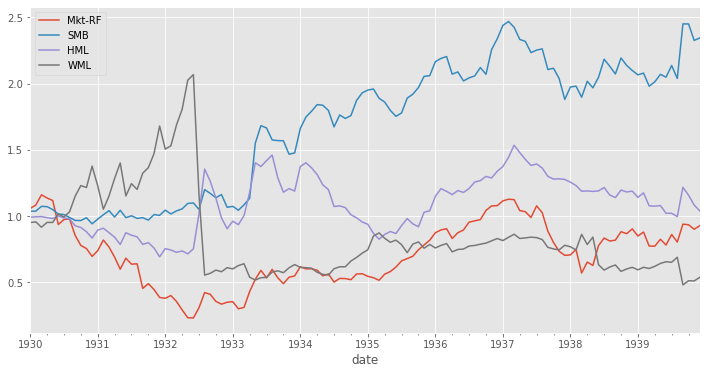

In [13]:
(df[(df.index.year<1940) & (df.index.year>1929) ]/100+1).cumprod().plot(figsize=(12,6))

<AxesSubplot:xlabel='date'>

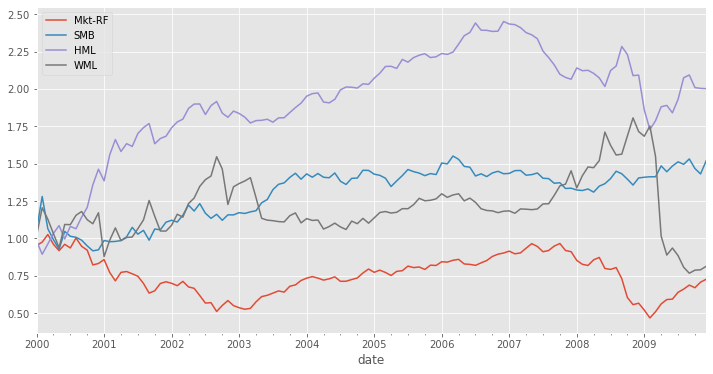

In [14]:
(df[(df.index.year<2010) & (df.index.year>1999) ]/100+1).cumprod().plot(figsize=(12,6))

In [15]:
import statsmodels.formula.api as smf
df=df.rename(columns={"Mkt-RF":'RMRF'})

In [16]:
olsm=smf.ols('WML~RMRF+SMB+HML',data=df[(df.index.year>=1926) & (df.index.year<=2011) ]).fit()

In [17]:
print(olsm.summary())

                            OLS Regression Results                            
Dep. Variable:                    WML   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           5.76e-57
Time:                        20:08:15   Log-Likelihood:                -2914.7
No. Observations:                1020   AIC:                             5837.
Df Residuals:                    1016   BIC:                             5857.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0225      0.134      7.652      0.0

In [18]:
df

,RMRF,SMB,HML,WML
date,,,,
1927-01-01,-0.06,-0.56,4.83,0.44
1927-02-01,4.18,-0.10,3.17,-1.32
1927-03-01,0.13,-1.60,-2.67,3.59
1927-04-01,0.46,0.43,0.60,4.17
1927-05-01,5.44,1.41,4.93,2.96
...,...,...,...,...
2020-07-01,5.77,-2.18,-1.39,7.61
2020-08-01,7.63,-0.25,-2.94,0.51
2020-09-01,-3.63,0.06,-2.51,3.05


In [19]:
df2=pd.read_csv("wml_star.csv")

In [20]:
df2['date']=df2['Unnamed: 0'].apply(mytime)
df2=df2.iloc[:,1:].set_index('date')
df2.index=pd.to_datetime(df2.index)
df2

,WML
date,
1927-05-01,10.371755
1927-06-01,4.870327
1927-07-01,8.116460
1927-08-01,5.161977
1927-09-01,5.730333
...,...
2020-08-01,0.007533
2020-09-01,0.393740
2020-10-01,-0.428870


In [21]:
df['WML*']=df2['WML']

In [22]:
df

,RMRF,SMB,HML,WML,WML*
date,,,,,
1927-01-01,-0.06,-0.56,4.83,0.44,NaN
1927-02-01,4.18,-0.10,3.17,-1.32,NaN
1927-03-01,0.13,-1.60,-2.67,3.59,NaN
1927-04-01,0.46,0.43,0.60,4.17,NaN
1927-05-01,5.44,1.41,4.93,2.96,10.371755
...,...,...,...,...,...
2020-07-01,5.77,-2.18,-1.39,7.61,0.810491
2020-08-01,7.63,-0.25,-2.94,0.51,0.007533
2020-09-01,-3.63,0.06,-2.51,3.05,0.393740


In [23]:
df.to_csv("final_montly_returns.csv")

In [24]:
df=df.dropna()

<AxesSubplot:ylabel='Density'>

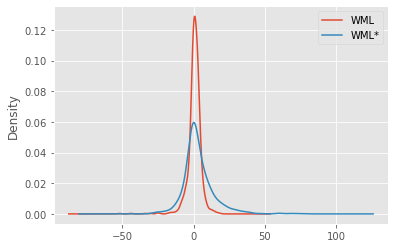

In [25]:
df[(df.index>=dt.datetime(1926,3,1)) & (df.index.year<=2011) ][['WML','WML*']].plot.kde()

In [26]:
df[(df.index>=dt.datetime(1926,3,1)) & (df.index.year<=2011) ][['WML','WML*']]

,WML,WML*
date,,
1927-05-01,2.96,10.371755
1927-06-01,0.53,4.870327
1927-07-01,4.29,8.116460
1927-08-01,1.14,5.161977
1927-09-01,1.89,5.730333
...,...,...
2011-08-01,-0.34,-1.830318
2011-09-01,-2.52,3.000454
2011-10-01,-1.44,-4.456571


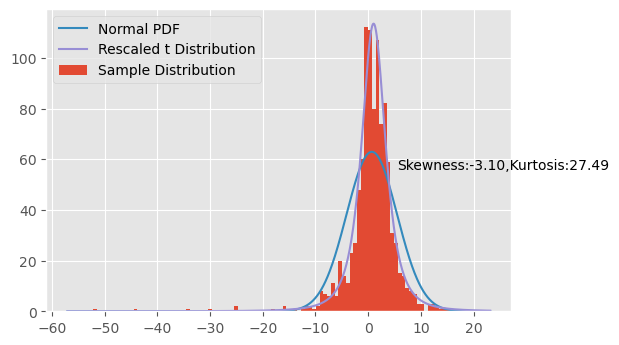

In [27]:
nvar.myhist(df[(df.index>=dt.datetime(1926,3,1)) & (df.index.year<=2011) ]['WML'],bins=100)

Text(0.5, 1.0, 'Panel A: Density of WML and WML* monthly returns')

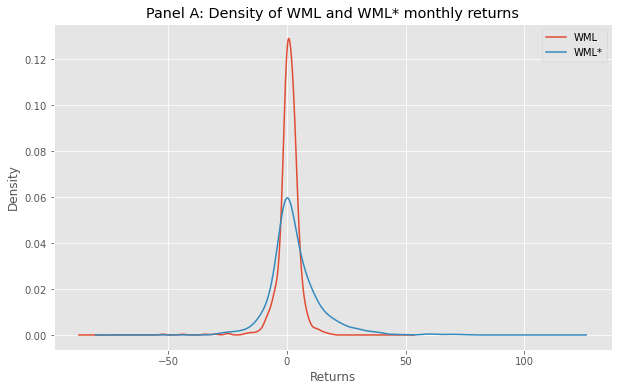

In [28]:
"""
Fig. 5. The density of plain momentum (WML) and risk-managed momentum (WMLn). The risk-managed momentum uses the realized variance in the previous six months to scale the exposure to momentum. The returns are from 1927:03 to 2011:12.
"""

# Panel A: Density of WML and WML* monthly returns
df[(df.index>=dt.datetime(1927,3,1)) & (df.index.year<=2011) ][['WML','WML*']].plot(kind='kde',figsize=(10,6),xlabel='Returns').set_xlabel("Returns")
plt.title("Panel A: Density of WML and WML* monthly returns")

Text(0.5, 1.0, 'Panel B: Density of WML and WML* for returns lower than −10 percentage points')

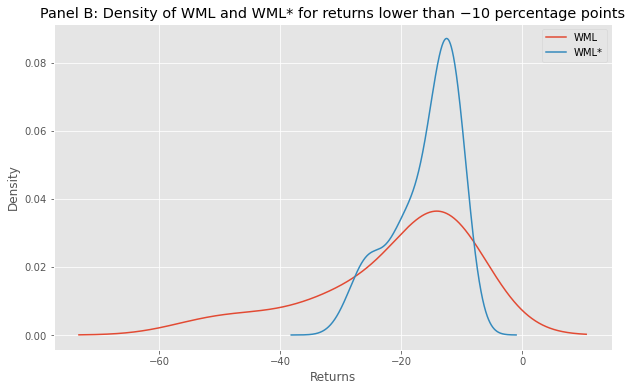

In [29]:
#Panel B: Density of WML and WML* for returns lower than −10 percentage points
dftemp=df[(df.index>=dt.datetime(1927,3,1)) & (df.index.year<=2011) ][['WML','WML*']]
dftemp[(dftemp['WML']<=-10)]['WML'].plot(kind='kde',figsize=(10,6),xlabel='Return').set_xlabel("Returns")
dftemp[(dftemp['WML*']<=-10)]['WML*'].plot(kind='kde',figsize=(10,6),xlabel='Return').set_xlabel("Returns")
plt.legend()
plt.title("Panel B: Density of WML and WML* for returns lower than −10 percentage points")


Text(0.5, 1.0, 'Panel A: Risk−managed momentum: 1930:01 to 1939:12')

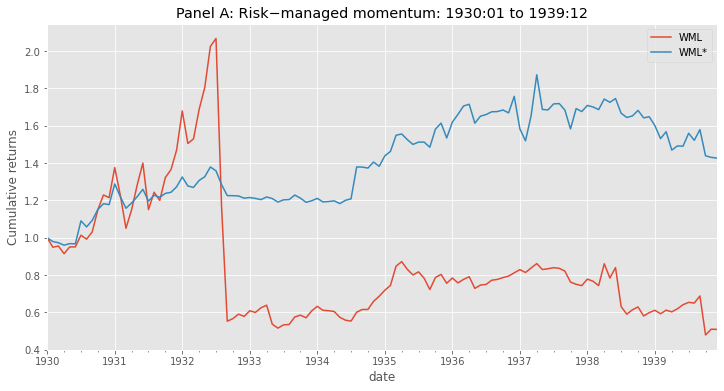

In [30]:
"""
Fig. 6. The benefits of risk-management in the 1930s and the 2000s. The risk-managed momentum (WMLn) uses the realized variance in the previous six months to scale the exposure to momentum (WML).
"""

# Panel A: Risk−managed momentum: 1930:01 to 1939:12
dftemp=(df[(df.index.year<1940) & (df.index.year>1929) ]/100+1)[['WML','WML*']].cumprod().shift(1)
dftemp.iloc[0,:]=[1,1]
dftemp.plot(figsize=(12,6),ylabel='Cumulative returns')
plt.title("Panel A: Risk−managed momentum: 1930:01 to 1939:12")

Text(0.5, 1.0, 'Panel B: Risk−managed momentum: 2000:01 to 2009:12')

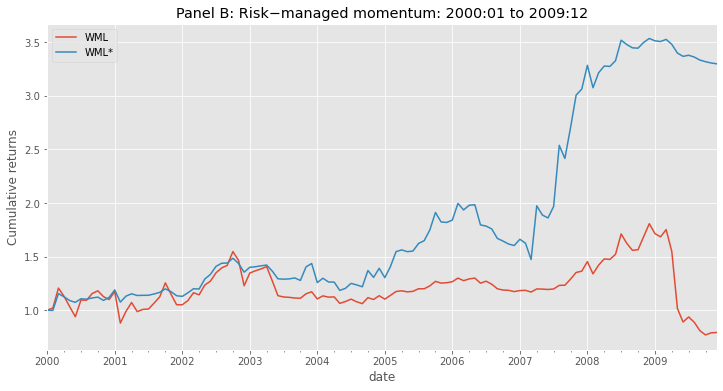

In [31]:
#Panel B: Risk−managed momentum: 2000:01 to 2009:12
dftemp=(df[(df.index.year<2010) & (df.index.year>1999) ]/100+1)[['WML','WML*']].cumprod().shift(1)
dftemp.iloc[0,:]=[1,1]
dftemp.plot(figsize=(12,6),ylabel='Cumulative returns')
plt.title("Panel B: Risk−managed momentum: 2000:01 to 2009:12")

In [172]:

# figure 2
data_daily = pd.read_csv("data_daily.CSV")

def mytime2(s):
    s=str(s)
    return dt.datetime.strptime(s,'%Y-%m-%d').date()



data_daily['date']=data_daily['Unnamed: 0'].apply(mytime2) 
data_daily=data_daily.iloc[:,1:].set_index('date')
data_daily.index=pd.to_datetime(data_daily.index)
data_daily=data_daily.rename(columns={"Mkt-RF":'RMRF'})

In [173]:
data_daily

,RMRF,SMB,HML,WML
date,,,,
1926-11-03,0.20,-0.24,-0.28,0.57
1926-11-04,0.59,-0.15,0.69,-0.52
1926-11-05,0.07,-0.09,0.23,1.15
1926-11-06,0.16,-0.29,0.05,-0.04
1926-11-08,0.52,-0.07,0.08,-0.01
...,...,...,...,...
2021-01-25,0.28,-0.07,-0.45,0.35
2021-01-26,-0.32,0.00,0.03,0.23
2021-01-27,-2.53,1.30,1.47,-0.68


In [290]:
#The realized variances and betas are estimated with six months of daily returns. On average
RV=(((data_daily/100)**2).rolling(window=121).sum()/121*21).dropna().resample('6M').last()
RV


,RMRF,SMB,HML,WML
date,,,,
1927-03-31,0.000385,0.000196,0.000542,0.000359
1927-09-30,0.000598,0.000205,0.000325,0.000573
1928-03-31,0.000599,0.000271,0.000270,0.000563
1928-09-30,0.001561,0.000485,0.000311,0.000788
1929-03-31,0.002385,0.000525,0.000448,0.000913
...,...,...,...,...
2019-03-31,0.003490,0.000599,0.001118,0.000932
2019-09-30,0.001656,0.000593,0.000823,0.001990
2020-03-31,0.013851,0.001544,0.002126,0.001607


In [293]:
RV['beta']=np.nan
from scipy.stats import pearsonr
import scipy.stats as stats
for i in np.arange(len(RV)):
    date=RV.index[i]
    try:
        iindex=np.where((data_daily.index.year==date.year) &(data_daily.index.month==date.month))[0][-1]
    except:
        iindex=np.where((data_daily.index.year==date.year) &(data_daily.index.month==date.month-2))[0][-1]
    
   
    
    y=data_daily['WML'][iindex-126:iindex-1]/100
    x=data_daily['RMRF'][iindex-126:iindex-1]/100
    try:
        RV.iloc[i,4]=stats.linregress(x,y)[0]
    except:
        pass

In [294]:
RV['beta2_times_RV_RMRF']=RV['beta']**2*RV['RMRF']
RV['simgas2']=RV['WML']-RV['beta2_times_RV_RMRF']

In [295]:
RV.dropna(inplace=True)
RV

,RMRF,SMB,HML,WML,beta,beta2_times_RV_RMRF,simgas2
date,,,,,,,
1927-09-30,0.000598,0.000205,0.000325,0.000573,0.594424,2.113446e-04,0.000361
1928-03-31,0.000599,0.000271,0.000270,0.000563,0.386968,8.975971e-05,0.000473
1928-09-30,0.001561,0.000485,0.000311,0.000788,0.570248,5.077408e-04,0.000280
1929-03-31,0.002385,0.000525,0.000448,0.000913,0.510129,6.206547e-04,0.000292
1929-09-30,0.001985,0.000606,0.000396,0.000818,0.296150,1.741185e-04,0.000644
...,...,...,...,...,...,...,...
2019-03-31,0.003490,0.000599,0.001118,0.000932,0.066887,1.561242e-05,0.000916
2019-09-30,0.001656,0.000593,0.000823,0.001990,-0.403792,2.700558e-04,0.001720
2020-03-31,0.013851,0.001544,0.002126,0.001607,0.000842,9.819881e-09,0.001607


In [296]:
np.mean((RV['beta2_times_RV_RMRF']/RV['WML'])[:])

0.3146369223242804

In [297]:
np.mean((RV['simgas2']/RV['WML'])[:])

0.6853630776757197

In [298]:
olsm=smf.ols('WML~RMRF',data=RV).fit() 
print(olsm.summary())

                            OLS Regression Results                            
Dep. Variable:                    WML   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     169.2
Date:                Sat, 20 Mar 2021   Prob (F-statistic):           6.33e-28
Time:                        23:21:59   Log-Likelihood:                 960.69
No. Observations:                 188   AIC:                            -1917.
Df Residuals:                     186   BIC:                            -1911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0003      0.000      1.921      0.0

In [299]:
resid=olsm.resid

In [300]:
"""
Table 4
Decomposition of the risk of momentum.
Each row shows the results of an AR(1) for six-month, non-overlapping
periods. The first row is for the realized variance of the WML (winners minus losers); the second one, the realized variance of the market. The third row is squared beta, estimated as a simple regression of 126 daily returns of the WML on RMRF (market risk factor). The fourth row is the systematic component of momentum risk; the last row, the specific component. The out of sample R-squares use an expanding window of observations after an initial in-sample period of 20 years.
"""
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)
RV

,RMRF,SMB,HML,WML,beta,beta2_times_RV_RMRF,simgas2
date,,,,,,,
1927-09-30,0.000598,0.000205,0.000325,0.000573,0.594424,2.113446e-04,0.000361
1928-03-31,0.000599,0.000271,0.000270,0.000563,0.386968,8.975971e-05,0.000473
1928-09-30,0.001561,0.000485,0.000311,0.000788,0.570248,5.077408e-04,0.000280
1929-03-31,0.002385,0.000525,0.000448,0.000913,0.510129,6.206547e-04,0.000292
1929-09-30,0.001985,0.000606,0.000396,0.000818,0.296150,1.741185e-04,0.000644
...,...,...,...,...,...,...,...
2019-03-31,0.003490,0.000599,0.001118,0.000932,0.066887,1.561242e-05,0.000916
2019-09-30,0.001656,0.000593,0.000823,0.001990,-0.403792,2.700558e-04,0.001720
2020-03-31,0.013851,0.001544,0.002126,0.001607,0.000842,9.819881e-09,0.001607


In [327]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

# define model
model = ARIMA(RV['WML'], order=(1,0,0),dates=RV.index[:40])
#fit the model

model_fit = model.fit()
print(model_fit.summary())


                              ARMA Model Results                              
Dep. Variable:                    WML   No. Observations:                  188
Model:                     ARMA(1, 0)   Log Likelihood                 942.640
Method:                       css-mle   S.D. of innovations              0.002
Date:                Sat, 20 Mar 2021   AIC                          -1879.280
Time:                        23:39:30   BIC                          -1869.571
Sample:                    09-30-1927   HQIC                         -1875.347
                         - 03-31-1947                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.000      4.153      0.000       0.001       0.002
ar.L1.WML      0.6271      0.060     10.451      0.000       0.510       0.745
                                    Roots           

In [309]:
# smf.ols('WML~WML_lag1',data=RV.iloc[:40,:].assign(WML_lag1=RV['WML'].shift(1)).iloc[1:,:]).fit().summary()

In [331]:
from sklearn.metrics import r2_score
import scipy

def rsquared(x, y):
    """ Return R^2 where x and y are array-like."""

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
    return r_value**2

R2=rsquared(model_fit.fittedvalues[:40],RV['WML'][0:40])
R2_OOS=rsquared(model_fit.fittedvalues[40:],RV['WML'][40:])

print("Rsquared:",R2,"OOS_Rsquared:",R2_OOS)

Rsquared: 0.10980034438103912 OOS_Rsquared: 0.46332467975698083


In [332]:
# define model
model = ARIMA(RV['RMRF'], order=(1,0,0),dates=RV.index[:40])
#fit the model
model_fit = model.fit()


print(model_fit.summary())


                              ARMA Model Results                              
Dep. Variable:                   RMRF   No. Observations:                  188
Model:                     ARMA(1, 0)   Log Likelihood                 829.275
Method:                       css-mle   S.D. of innovations              0.003
Date:                Sat, 20 Mar 2021   AIC                          -1652.550
Time:                        23:40:44   BIC                          -1642.840
Sample:                    09-30-1927   HQIC                         -1648.616
                         - 03-31-1947                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.000      5.737      0.000       0.002       0.003
ar.L1.RMRF     0.4808      0.064      7.555      0.000       0.356       0.606
                                    Roots           

In [334]:
R2=rsquared(model_fit.fittedvalues[0:40],RV['RMRF'][0:40])
R2_OOS=rsquared(model_fit.fittedvalues[40:],RV['RMRF'][40:])

print("Rsquared:",R2,"OOS_Rsquared:",R2_OOS)

Rsquared: 0.38344454893782365 OOS_Rsquared: 0.09042124607984925


In [335]:
# define model
model = ARIMA(RV['simgas2'], order=(1,0,0),dates=RV.index[:40])
#fit the model
from time import time
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

print(model_fit.summary())


Model Fitting Time: 0.05873608589172363
                              ARMA Model Results                              
Dep. Variable:                simgas2   No. Observations:                  188
Model:                     ARMA(1, 0)   Log Likelihood                1031.056
Method:                       css-mle   S.D. of innovations              0.001
Date:                Sat, 20 Mar 2021   AIC                          -2056.112
Time:                        23:41:24   BIC                          -2046.402
Sample:                    09-30-1927   HQIC                         -2052.178
                         - 03-31-1947                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0009      0.000      3.353      0.001       0.000       0.001
ar.L1.simgas2     0.7144      0.062     11.513      0.000       0.593       0.836


In [336]:
R2=rsquared(model_fit.fittedvalues[0:40],RV['simgas2'][0:40])
R2_OOS=rsquared(model_fit.fittedvalues[40:],RV['simgas2'][40:])

print("Rsquared:",R2,"OOS_Rsquared:",R2_OOS)

Rsquared: 0.229989962924791 OOS_Rsquared: 0.43928795328771125


In [337]:
# define model
model = ARIMA(RV['beta']**2, order=(1,0,0),dates=RV.index[:40])
#fit the model

model_fit = model.fit()


print(model_fit.summary())


                              ARMA Model Results                              
Dep. Variable:                   beta   No. Observations:                  188
Model:                     ARMA(1, 0)   Log Likelihood                   6.684
Method:                       css-mle   S.D. of innovations              0.234
Date:                Sat, 20 Mar 2021   AIC                             -7.367
Time:                        23:41:56   BIC                              2.342
Sample:                    09-30-1927   HQIC                            -3.433
                         - 03-31-1947                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1884      0.019      9.822      0.000       0.151       0.226
ar.L1.beta     0.1125      0.072      1.552      0.121      -0.030       0.255
                                    Roots           

In [338]:

R2=rsquared(model_fit.fittedvalues[0:40],(RV['beta']**2)[0:40])
R2_OOS=rsquared(model_fit.fittedvalues[40:],(RV['beta']**2)[40:])

print("Rsquared:",R2,"OOS_Rsquared:",R2_OOS)

Rsquared: 0.01602264333778055 OOS_Rsquared: 0.041637618707586574


In [339]:
# define model
model = ARIMA(RV['beta2_times_RV_RMRF'], order=(1,0,0),dates=RV.index[:40])
#fit the model
from time import time

model_fit = model.fit()

print(model_fit.summary())


                               ARMA Model Results                              
Dep. Variable:     beta2_times_RV_RMRF   No. Observations:                  188
Model:                      ARMA(1, 0)   Log Likelihood                1047.747
Method:                        css-mle   S.D. of innovations              0.001
Date:                 Sat, 20 Mar 2021   AIC                          -2089.494
Time:                         23:42:45   BIC                          -2079.785
Sample:                     09-30-1927   HQIC                         -2085.560
                          - 03-31-1947                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.0005      0.000      4.025      0.000       0.000       0.001
ar.L1.beta2_times_RV_RMRF     0.4368      0.065      6.685      0.000       0.

In [341]:

R2=rsquared(model_fit.fittedvalues[0:40],RV['beta2_times_RV_RMRF'][0:40])
R2_OOS=rsquared(model_fit.fittedvalues[40:],RV['beta2_times_RV_RMRF'][40:])

print("Rsquared:",R2,"OOS_Rsquared:",R2_OOS)

Rsquared: 0.0255002886736902 OOS_Rsquared: 0.3410337883159309


In [ ]:
# 7. Robustness checks

In [364]:
final_df=pd.DataFrame()
# First harf
df_temp=df[(df.index>=dt.datetime(1927,3,1)) & (df.index<dt.datetime(1970,1,1))]

def describe_data(series):
    max = series.max()
    min = series.min()
    mean = series.mean()*12
    std = series.std()*np.sqrt(12)
    kurt = series.kurt()
    skew = series.skew()
    sharpe = mean / std
    names = ['Maximum', 'Minimum', 'Mean', 'Standard Deviation', 'Kurtosis', 'Skewness', 'Sharpe Ratio']
    return pd.Series([max, min, mean, std, kurt, skew, sharpe], index=names)

df_fisrt_half_WML=pd.DataFrame(describe_data(df_temp['WML']),columns=['First_half_WML'])

In [365]:
final_df=pd.concat([final_df,df_fisrt_half_WML],1)
final_df

,First_half_WML
Maximum,15.750000
Minimum,-52.270000
Mean,8.274141
Standard Deviation,17.658631
Kurtosis,37.475460
Skewness,-4.225832
Sharpe Ratio,0.468561


In [366]:

# Second harf
df_temp=df[(df.index>=dt.datetime(1970,1,1)) & (df.index<dt.datetime(2012,1,1))]

def describe_data(series):
    max = series.max()
    min = series.min()
    mean = series.mean()*12
    std = series.std()*np.sqrt(12)
    kurt = series.kurt()
    skew = series.skew()
    sharpe = mean / std
    names = ['Maximum', 'Minimum', 'Mean', 'Standard Deviation', 'Kurtosis', 'Skewness', 'Sharpe Ratio']
    return pd.Series([max, min, mean, std, kurt, skew, sharpe], index=names)

df_temp=pd.DataFrame(describe_data(df_temp['WML']),columns=['Second_half_WML'])

final_df=pd.concat([final_df,df_temp],1)
final_df

,First_half_WML,Second_half_WML
Maximum,15.750000,18.360000
Minimum,-52.270000,-34.390000
Mean,8.274141,8.284286
Standard Deviation,17.658631,15.594107
Kurtosis,37.475460,10.331931
Skewness,-4.225832,-1.409848
Sharpe Ratio,0.468561,0.531245


In [367]:
# First harf WHL*
df_temp=df[(df.index>=dt.datetime(1927,3,1)) & (df.index<dt.datetime(1970,1,1))]

def describe_data(series):
    max = series.max()
    min = series.min()
    mean = series.mean()*12
    std = series.std()*np.sqrt(12)
    kurt = series.kurt()
    skew = series.skew()
    sharpe = mean / std
    names = ['Maximum', 'Minimum', 'Mean', 'Standard Deviation', 'Kurtosis', 'Skewness', 'Sharpe Ratio']
    return pd.Series([max, min, mean, std, kurt, skew, sharpe], index=names)

df_temp=pd.DataFrame(describe_data(df_temp['WML*']),columns=['First_half_WML*'])


final_df=pd.concat([final_df,df_temp],1)
final_df

,First_half_WML,Second_half_WML,First_half_WML*
Maximum,15.750000,18.360000,61.049854
Minimum,-52.270000,-34.390000,-28.863594
Mean,8.274141,8.284286,33.966127
Standard Deviation,17.658631,15.594107,34.400533
Kurtosis,37.475460,10.331931,7.144236
Skewness,-4.225832,-1.409848,1.548785
Sharpe Ratio,0.468561,0.531245,0.987372


In [368]:

# Second harf
df_temp=df[(df.index>=dt.datetime(1970,1,1)) & (df.index<dt.datetime(2012,1,1))]

def describe_data(series):
    max = series.max()
    min = series.min()
    mean = series.mean()*12
    std = series.std()*np.sqrt(12)
    kurt = series.kurt()
    skew = series.skew()
    sharpe = mean / std
    names = ['Maximum', 'Minimum', 'Mean', 'Standard Deviation', 'Kurtosis', 'Skewness', 'Sharpe Ratio']
    return pd.Series([max, min, mean, std, kurt, skew, sharpe], index=names)

df_temp=pd.DataFrame(describe_data(df_temp['WML*']),columns=['Second_half_WML*'])

final_df=pd.concat([final_df,df_temp],1)
final_df

,First_half_WML,Second_half_WML,First_half_WML*,Second_half_WML*
Maximum,15.750000,18.360000,61.049854,74.398880
Minimum,-52.270000,-34.390000,-28.863594,-26.485359
Mean,8.274141,8.284286,33.966127,47.555977
Standard Deviation,17.658631,15.594107,34.400533,40.834795
Kurtosis,37.475460,10.331931,7.144236,6.481328
Skewness,-4.225832,-1.409848,1.548785,1.639335
Sharpe Ratio,0.468561,0.531245,0.987372,1.164594


In [369]:
# non crash WHL

df_temp=df[(df.index>=dt.datetime(1927,3,1)) & (df.index<dt.datetime(2012,1,1)) & (df.index.year!=1932) & (df.index.year!=2009) ]

def describe_data(series):
    max = series.max()
    min = series.min()
    mean = series.mean()*12
    std = series.std()*np.sqrt(12)
    kurt = series.kurt()
    skew = series.skew()
    sharpe = mean / std
    names = ['Maximum', 'Minimum', 'Mean', 'Standard Deviation', 'Kurtosis', 'Skewness', 'Sharpe Ratio']
    return pd.Series([max, min, mean, std, kurt, skew, sharpe], index=names)

df_temp=pd.DataFrame(describe_data(df_temp['WML']),columns=['Non_Crash_WML'])

final_df=pd.concat([final_df,df_temp],1)
final_df

,First_half_WML,Second_half_WML,First_half_WML*,Second_half_WML*,Non_Crash_WML
Maximum,15.750000,18.360000,61.049854,74.398880,18.360000
Minimum,-52.270000,-34.390000,-28.863594,-26.485359,-30.350000
Mean,8.274141,8.284286,33.966127,47.555977,10.023750
Standard Deviation,17.658631,15.594107,34.400533,40.834795,14.117097
Kurtosis,37.475460,10.331931,7.144236,6.481328,8.469114
Skewness,-4.225832,-1.409848,1.548785,1.639335,-1.077464
Sharpe Ratio,0.468561,0.531245,0.987372,1.164594,0.710043


In [370]:
# non crash WHL

df_temp=df[(df.index>=dt.datetime(1927,3,1)) & (df.index<dt.datetime(2012,1,1)) & (df.index.year!=1932) & (df.index.year!=2009) ]

def describe_data(series):
    max = series.max()
    min = series.min()
    mean = series.mean()*12
    std = series.std()*np.sqrt(12)
    kurt = series.kurt()
    skew = series.skew()
    sharpe = mean / std
    names = ['Maximum', 'Minimum', 'Mean', 'Standard Deviation', 'Kurtosis', 'Skewness', 'Sharpe Ratio']
    return pd.Series([max, min, mean, std, kurt, skew, sharpe], index=names)

df_temp=pd.DataFrame(describe_data(df_temp['WML*']),columns=['Non_Crash_WML*'])

final_df=pd.concat([final_df,df_temp],1)
final_df

,First_half_WML,Second_half_WML,First_half_WML*,Second_half_WML*,Non_Crash_WML,Non_Crash_WML*
Maximum,15.750000,18.360000,61.049854,74.398880,18.360000,74.398880
Minimum,-52.270000,-34.390000,-28.863594,-26.485359,-30.350000,-28.863594
Mean,8.274141,8.284286,33.966127,47.555977,10.023750,41.842388
Standard Deviation,17.658631,15.594107,34.400533,40.834795,14.117097,38.140993
Kurtosis,37.475460,10.331931,7.144236,6.481328,8.469114,6.787795
Skewness,-4.225832,-1.409848,1.548785,1.639335,-1.077464,1.606495
Sharpe Ratio,0.468561,0.531245,0.987372,1.164594,0.710043,1.097045


In [371]:
# Post_war WHL

df_temp=df[(df.index.year>=1945) & (df.index.year<=2005) ]

def describe_data(series):
    max = series.max()
    min = series.min()
    mean = series.mean()*12
    std = series.std()*np.sqrt(12)
    kurt = series.kurt()
    skew = series.skew()
    sharpe = mean / std
    names = ['Maximum', 'Minimum', 'Mean', 'Standard Deviation', 'Kurtosis', 'Skewness', 'Sharpe Ratio']
    return pd.Series([max, min, mean, std, kurt, skew, sharpe], index=names)

df_temp=pd.DataFrame(describe_data(df_temp['WML']),columns=['Post_War_WML'])

final_df=pd.concat([final_df,df_temp],1)
final_df

,First_half_WML,Second_half_WML,First_half_WML*,Second_half_WML*,Non_Crash_WML,Non_Crash_WML*,Post_War_WML
Maximum,15.750000,18.360000,61.049854,74.398880,18.360000,74.398880,18.360000
Minimum,-52.270000,-34.390000,-28.863594,-26.485359,-30.350000,-28.863594,-25.050000
Mean,8.274141,8.284286,33.966127,47.555977,10.023750,41.842388,10.270820
Standard Deviation,17.658631,15.594107,34.400533,40.834795,14.117097,38.140993,12.520057
Kurtosis,37.475460,10.331931,7.144236,6.481328,8.469114,6.787795,6.389667
Skewness,-4.225832,-1.409848,1.548785,1.639335,-1.077464,1.606495,-0.650407
Sharpe Ratio,0.468561,0.531245,0.987372,1.164594,0.710043,1.097045,0.820349


In [372]:
# Post_war WHL*

df_temp=df[(df.index.year>=1945) & (df.index.year<=2005) ]

def describe_data(series):
    max = series.max()
    min = series.min()
    mean = series.mean()*12
    std = series.std()*np.sqrt(12)
    kurt = series.kurt()
    skew = series.skew()
    sharpe = mean / std
    names = ['Maximum', 'Minimum', 'Mean', 'Standard Deviation', 'Kurtosis', 'Skewness', 'Sharpe Ratio']
    return pd.Series([max, min, mean, std, kurt, skew, sharpe], index=names)

df_temp=pd.DataFrame(describe_data(df_temp['WML*']),columns=['Post_War_WML*'])

final_df=pd.concat([final_df,df_temp],1)
final_df

,First_half_WML,Second_half_WML,First_half_WML*,Second_half_WML*,Non_Crash_WML,Non_Crash_WML*,Post_War_WML,Post_War_WML*
Maximum,15.750000,18.360000,61.049854,74.398880,18.360000,74.398880,18.360000,74.398880
Minimum,-52.270000,-34.390000,-28.863594,-26.485359,-30.350000,-28.863594,-25.050000,-28.863594
Mean,8.274141,8.284286,33.966127,47.555977,10.023750,41.842388,10.270820,50.382744
Standard Deviation,17.658631,15.594107,34.400533,40.834795,14.117097,38.140993,12.520057,41.780592
Kurtosis,37.475460,10.331931,7.144236,6.481328,8.469114,6.787795,6.389667,5.566394
Skewness,-4.225832,-1.409848,1.548785,1.639335,-1.077464,1.606495,-0.650407,1.471746
Sharpe Ratio,0.468561,0.531245,0.987372,1.164594,0.710043,1.097045,0.820349,1.205889


In [374]:
final_df=final_df[['First_half_WML','First_half_WML*','Second_half_WML',"Second_half_WML*",'Non_Crash_WML','Non_Crash_WML*','Post_War_WML','Post_War_WML*']]

In [375]:
final_df

,First_half_WML,First_half_WML*,Second_half_WML,Second_half_WML*,Non_Crash_WML,Non_Crash_WML*,Post_War_WML,Post_War_WML*
Maximum,15.750000,61.049854,18.360000,74.398880,18.360000,74.398880,18.360000,74.398880
Minimum,-52.270000,-28.863594,-34.390000,-26.485359,-30.350000,-28.863594,-25.050000,-28.863594
Mean,8.274141,33.966127,8.284286,47.555977,10.023750,41.842388,10.270820,50.382744
Standard Deviation,17.658631,34.400533,15.594107,40.834795,14.117097,38.140993,12.520057,41.780592
Kurtosis,37.475460,7.144236,10.331931,6.481328,8.469114,6.787795,6.389667,5.566394
Skewness,-4.225832,1.548785,-1.409848,1.639335,-1.077464,1.606495,-0.650407,1.471746
Sharpe Ratio,0.468561,0.987372,0.531245,1.164594,0.710043,1.097045,0.820349,1.205889


In [377]:
final_df.to_pickle("Table6.pkl")